
# BerquistSherman Adjustment

In [4]:
import chainladder as cl



This example demonstrates the adjustment to case reserves using the Berquist-Sherman
method. A key assumption, and highly sensitive one at that, is the selection of
a trend factor representative of the trend in average open case reserves from
year to year.


In [5]:
# Load data
triangle = cl.load_sample('berqsherm').loc['MedMal']

# Specify Berquist-Sherman model
berq = cl.BerquistSherman(
    paid_amount='Paid', incurred_amount='Incurred',
    reported_count='Reported', closed_count='Closed',
    trend=0.15)

# Adjust our triangle data
berq_triangle = berq.fit_transform(triangle)
berq_cdf = cl.Development().fit(berq_triangle['Incurred']).cdf_
orig_cdf = cl.Development().fit(triangle['Incurred']).cdf_

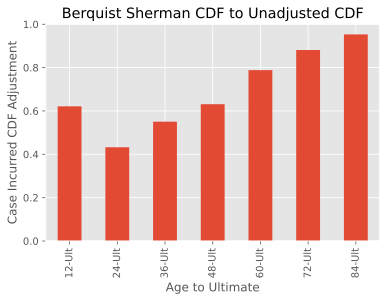

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the results
ax = (berq_cdf / orig_cdf).T.plot(
    kind='bar', grid=True, legend=False,
    title='Berquist Sherman CDF to Unadjusted CDF',
    xlabel='Age to Ultimate', 
    ylabel='Case Incurred CDF Adjustment');

In [9]:
from myst_nb import glue
glue("plot_berqsherm_case", ax.get_figure(), display=False)